In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5)

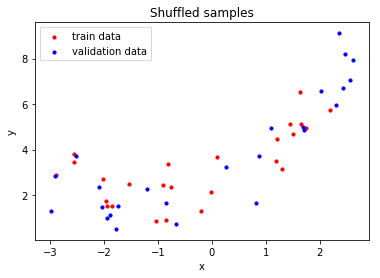

In [3]:
import matplotlib.pyplot as plt

plt.figure('Shuffed samples')
plt.title('Shuffled samples')
plt.scatter(X_train, y_train, c='r', s=10.0, marker='o', label='train data')
plt.scatter(X_val, y_val, c='b', s=10.0, marker='o', label='validation data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

preprocessor = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = preprocessor.fit_transform(X_train)
X_val_poly_scaled = preprocessor.transform(X_val)

In [5]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate='constant', eta0=0.0005)

minimul_val_error = float('inf')
best_epoch = None
best_model = None
max_iter = 500

train_errors = []
val_errors = []

for epoch in range(max_iter):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_error = mean_squared_error(y_train, y_train_predict)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimul_val_error:
        minimul_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    train_errors.append(train_error)
    val_errors.append(val_error)

best epoch: 71
minimum validation error: 4.263200603611824
best model: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=True)


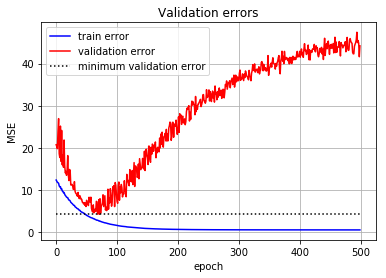

In [6]:
plt.figure('Validation errors')
plt.title('Validation errors')
plt.plot(train_errors, 'b', label='train error')
plt.plot(val_errors, 'r', label='validation error')
plt.plot([0, max_iter], [minimul_val_error, minimul_val_error], 'k:', label='minimum validation error')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.grid()


print('best epoch:', best_epoch)
print('minimum validation error:', minimul_val_error)
print('best model:', best_model)